### Summary of this Data set

The dataset contains information about different computer configurations and their prices. It includes numerical features like RAM, hard drive size, speed, and screen size, along with categorical features like the presence of a CD drive, multi-drive, and premium label.

In [55]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading and understand the data set

In [39]:
df =pd.read_csv("Documents/Data set/Computers.csv")

In [40]:
# Understand the Dataset
df.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [41]:
# Check the basic information about the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [51]:
df.shape
            

(6259, 10)

In [53]:

# Basic statistic details about the data
df.describe()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


### Data Cleaning 

In [44]:
# Drop the unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Convert categorical columns to numerical (Yes/No → 1/0)
df["cd"] = df["cd"].map({"no": 0, "yes": 1})
df["multi"] = df["multi"].map({"no": 0, "yes": 1})
df["premium"] = df["premium"].map({"no": 0, "yes": 1})

# Verify changes
df.head()


,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


### Univariate Analysis

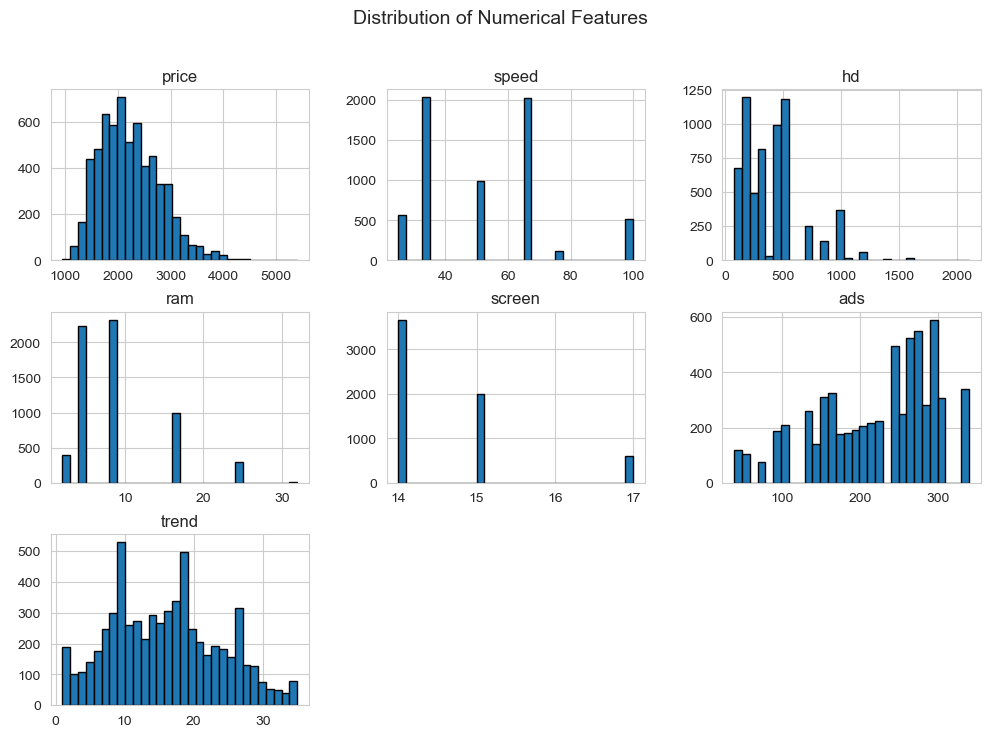

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3108\4212650710.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3108\4212650710.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3108\4212650710.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="Set2")


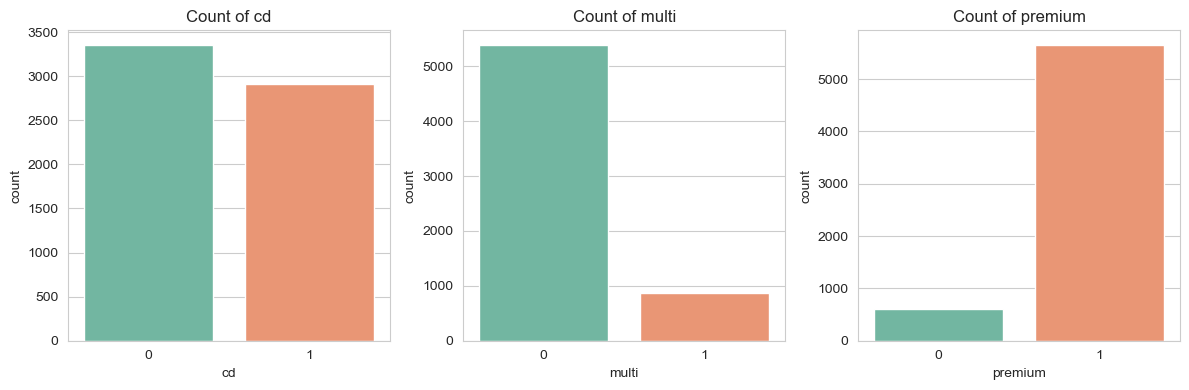

In [46]:


# Set plot style
sns.set_style("whitegrid")

# Define numerical and categorical columns
numerical_cols = ["price", "speed", "hd", "ram", "screen", "ads", "trend"]
categorical_cols = ["cd", "multi", "premium"]

# Plot histograms for numerical columns
df[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

# Plot count plots for categorical columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"Count of {col}")
plt.tight_layout()
plt.show()


In [54]:
### Bivariate Analysis

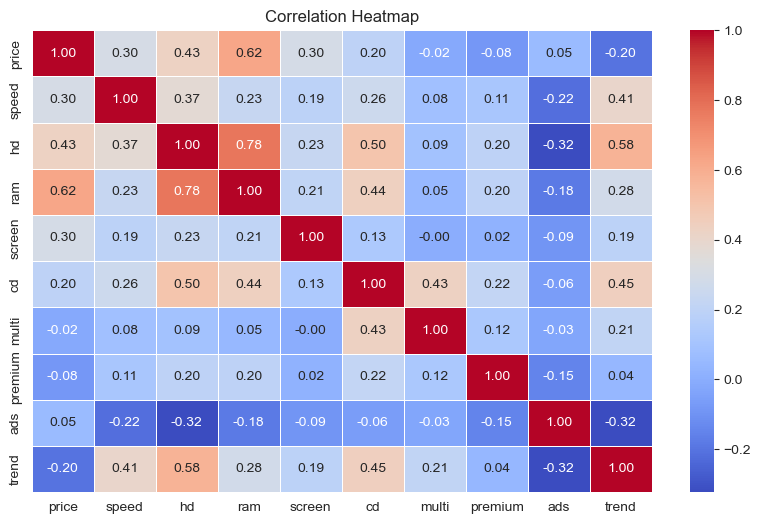

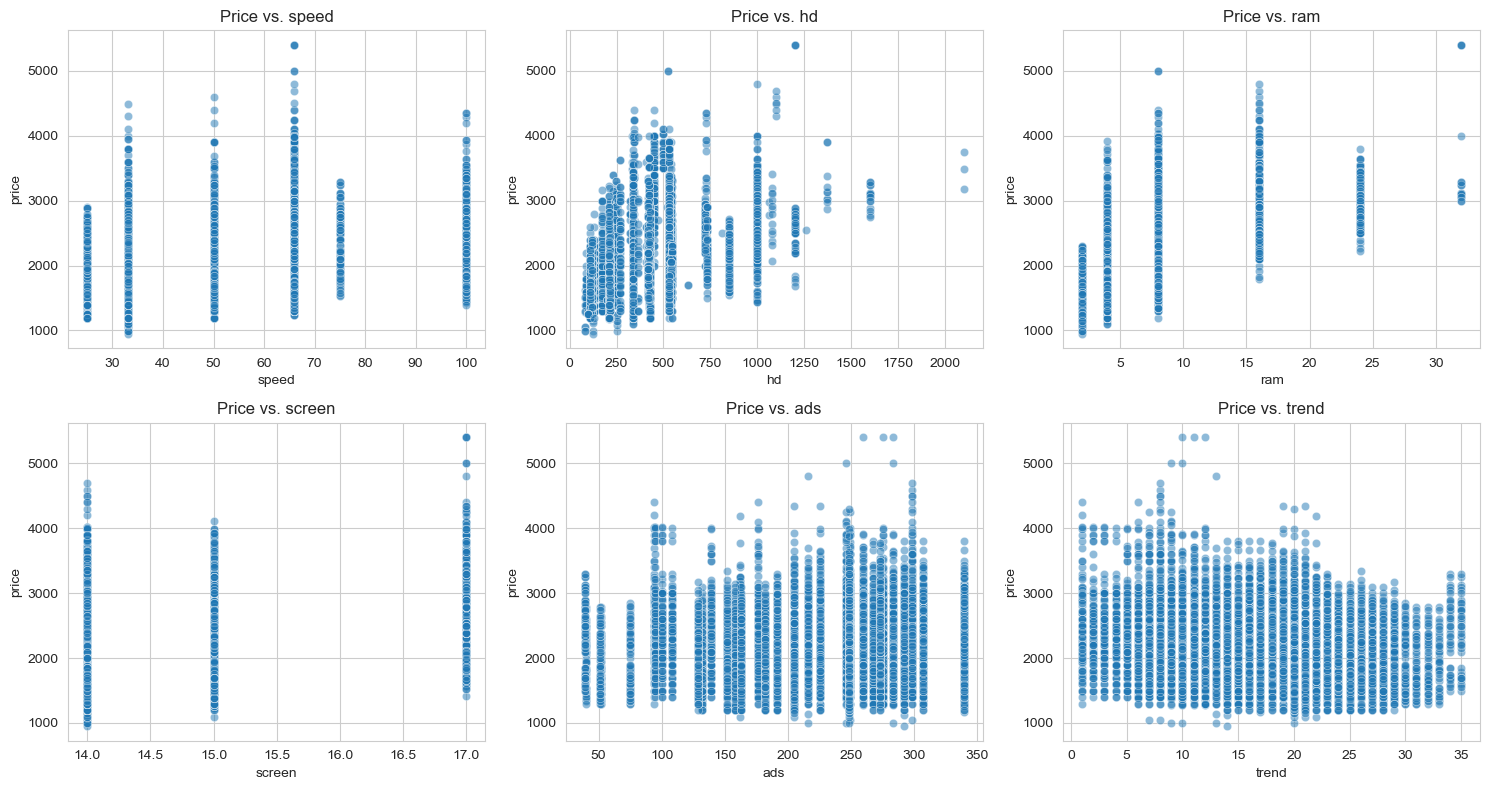

In [47]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots: Price vs. numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
features = ["speed", "hd", "ram", "screen", "ads", "trend"]

for i, col in enumerate(features):
    row, col_idx = divmod(i, 3)
    sns.scatterplot(x=df[col], y=df["price"], ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f"Price vs. {col}")

plt.tight_layout()
plt.show()


### Key Insights of this data set

###### Price is highly influenced by RAM, hard drive capacity (HD), and processing speed.
###### Premium computers are significantly more expensive than non-premium ones.
###### CD and Multi-drive features do not strongly impact the price.
###### The dataset contains no missing values, making it clean for analysis.
###### Potential outliers exist in price and hard drive capacity.